In [ ]:
from google.colab import drive
drive.mount('/content/drive')
RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import soundfile as sf
import librosa
import pathlib
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras 
import os
import cv2
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/BachelorResearch/models/efficient_net_v2_vanilla', compile=False)

In [ ]:
def min_max(x, axis=None): # do min_max normalization ?->https://atmarkit.itmedia.co.jp/ait/articles/2110/07/news027.html
    min = 0
    max = 154.28702 
    # max = 137.74599
    x = np.abs(x)
    result = (x-min)/(max-min)
    return result

def quality_prediction(audio_path): # return prediction value
  data, sr = librosa.load(audio_path) 
  broken_flag = False

  sum = np.zeros(4)
  for i in range(14):
    # Crop range
    start = i*2*sr
    stop  = (i*2 + 2)*sr

    # STFT
    n_fft=512
    hop_length=256
    try:
      stft = np.abs(librosa.stft(data[start:stop], n_fft=n_fft, hop_length=hop_length))
    except ValueError :
      # print("[PASS] No data in", audio_path)
      broken_flag = True
      continue

    # Normalization
    stft = min_max(stft)

    # Data Transform
    # input = np.expand_dims(stft, axis=0)
    # input = np.stack((input,)*3, axis=-1) # forced to make 3 channel img
    input = cv2.cvtColor(stft,cv2.COLOR_GRAY2RGB)
    input = np.expand_dims(input, axis=0)

    # np.set_printoptions(suppress=True)
    # print(input.shape)
    # print(type(input))
    # print(input[0,:,:,0])
    # print(input[0,:,:,1])
    # print(input[0,:,:,2])


    # Predict
    try:
      scores = model.predict(input)
    except ValueError:
      # print("[PASS] Not enough:", audio_path)
      scores = np.zeros(4)
      broken_flag = True
      continue

    # print(scores)

    # Get sum
    sum = sum + scores
  if broken_flag:
    print(pathlib.Path(audio_path).stem, "seems broken. len:", round(len(data)/sr,4) ,"sec")
  return sum




def path_to_audiofiles(dir_folder):
    list_of_audio = []
    for file in os.listdir(dir_folder):
        if file.endswith(".wav"):
            directory = "%s%s" % (dir_folder, file)
            list_of_audio.append(directory)
    return list_of_audio

RESEARCH_WORK_PATH = "/content/drive/My Drive/Colab Notebooks/BachelorResearch/"
unknown = RESEARCH_WORK_PATH + "MER_audio_taffc_dataset_wav/renamed/unknown/"


In [ ]:
# from tqdm import tqdm

data = np.zeros((4,4))

for audio in (path_to_audiofiles(unknown)):
  y = int(pathlib.Path(audio).stem[1])-1
  print("True: Q" +  str(y+1))
  p = np.argmax(quality_prediction(audio))
  print("Pred: Q" +  str(p+1))
  data[y][p] += 1

True: Q1
Pred: Q1
True: Q1


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=512 is too small for input signal of length=0
  n_fft, y.shape[-1]


Q1.MT0013914319 seems broken. len: 10.08 sec
Pred: Q3
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q4
True: Q1
Pred: Q1
True: Q1
Pred: Q3
True: Q1
Pred: Q1
True: Q1
Q1.MT0013621344 seems broken. len: 10.08 sec
Pred: Q1
True: Q1
Pred: Q1
True: Q1
Pred: Q3
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q3
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q1
True: Q2
Pred: Q3
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q1
True: Q2
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q2
True: Q2
Pred: Q1
True: Q3
Pred: Q1
True: Q3
Pred: Q3
True: Q3
Pred: Q1
True: Q2
Pred: Q2
True: Q2
Pred: Q2
T

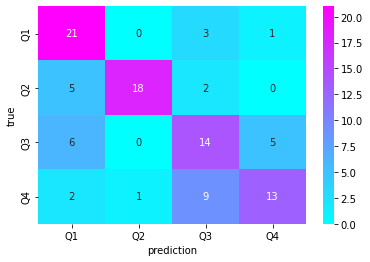

[[21.  0.  3.  1.]
 [ 5. 18.  2.  0.]
 [ 6.  0. 14.  5.]
 [ 2.  1.  9. 13.]]
[[84.  0. 12.  4.]
 [20. 72.  8.  0.]
 [24.  0. 56. 20.]
 [ 8.  4. 36. 52.]]


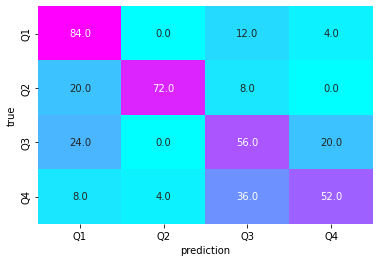

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

combined_arr = data
xl = ["Q1", "Q2", "Q3", "Q4"]
yl = xl


sns.heatmap(combined_arr, annot=True, fmt=".0f", xticklabels=xl, yticklabels=yl, cmap="cool")
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()
print(combined_arr)
print(np.array(combined_arr)/combined_arr.sum(axis=1)*100)
sns.heatmap(np.array(combined_arr)/combined_arr.sum(axis=1)*100, annot=True, fmt=".1f", xticklabels=xl, yticklabels=yl, cmap="cool", cbar=False)
plt.ylabel("true")
plt.xlabel("prediction")
plt.show()